<h1 align="center"> Analysis of Hidden Units in a Layered Network Trained to Classify Sonar   Targets </h1>
<h3 align="center"> Muhammad Zufar Badrus </h3>
<h3 align="center">(09011381722130)</h3>
<h4 align="center">SISTEM KOMPUTER </h1>
<h5 align="center">2017 </h1>

 Sebuah prosedur pembelajaran jaringan saraf telah diterapkan pada klasifikasi ~ / sonar mengembalikan [kom dua target bawah laut, silinder logam dan batu yang berbentuk serupa. Jaringan dengan lapisan menengah ~ / unit pemrosesan tersembunyi mencapai akurasi klasifikasi setinggi 100% pada set pelatihan pengembalian l04. Jaringan ini dengan benar mengklasifikasikan hingga 90,4% dari 104 hasil tes yang tidak terkandung dalam set pelatihan. Kinerja ini lebih baik daripada pengelompokan tetangga terdekat, yaitu 82,7%. dan dekat dengan Bayes classifie yang optimal ~ Fitur sinyal spesifik yang diekstraksi oleh unit tersembunyi dalam jaringan terlatih diidentifikasi dan terkait dengan skema pengkodean dalam pola kekuatan koneksi antara input dan unit tersembunyi. Perlakuan jaringan dan strategi kelas sebanding dengan pendengar manusia yang terlatih.

## informasi mengenai dataset
### Identifikasi Batuan biasa dan Batuan tambang (silinder logam)
Ini adalah kumpulan data yang digunakan oleh Gorman dan Sejnowski dalam studi mereka tentang klasifikasi sinyal sonar menggunakan jaringan saraf. Tugasnya adalah untuk melatih suatu jaringan untuk membedakan antara sinyal sonar yang memantul dari tabung logam dan yang memantul dari batuan berbentuk silindris. File "sonarfix.csv" berisi 111 pola yang diperoleh dengan memantulkan sinyal sonar dari silinder logam pada berbagai sudut dan dalam berbagai kondisi dan berisi 97 pola yang diperoleh dari bebatuan dalam kondisi yang sama. Set data berisi sinyal yang diperoleh dari berbagai sudut aspek yang berbeda, mencakup 90 derajat untuk silinder dan 180 derajat untuk batuan. Label yang terkait dengan setiap catatan berisi huruf "R" jika objeknya adalah batu dan "M" jika itu adalah ranjau (silinder logam). Angka-angka di label dalam urutan peningkatan sudut aspek, tetapi mereka tidak menyandikan sudut secara langsung.

# Import Library
1. numpy = Mengimport library numpy untuk mengolah data angka dan untuk membangun array dalam python¶
2. sklearn.preprocessing = mengimport library preprocessing untuk mengubah data menjadi format data yang lebih mudah untuk di proses
3. matplotlib.pyplot = mengimport library matplotlib untuk menampilkan visualisasi hasil dari permodelan nanti
4. sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya
5. keras.optimizers = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
6. keras.Model = mengimport library sequential untuk membuat hidden layer dengan tipe layer dense
7. keras.Layers = mengimport library sequential untuk membuat hidden layer dengan tipe layer dense
8. keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 
9. keras.Utils = mengimport library categorical untuk mengubah data binary menjadi data yang dapat di kelompokkan
10. pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
11. seaborn = Digubakan Untuk Visualisasi Data Secara Statistik

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils import np_utils
import pandas as pd
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Import dataset

setelah menginisiasi bobot awal maka langkah selanjutnya ialah, mengimport dataset "sonarfix.csv". dataset yang berformat csv tersebut kemudian di ubah menjadi format numpy kedalam variabel dataset


In [2]:
data = np.loadtxt('sonarfix.csv',delimiter=',', dtype=float)
data

array([[0.02  , 0.0371, 0.0428, ..., 0.009 , 0.0032, 0.    ],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 0.    ],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 0.    ],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0077, 0.0031, 1.    ],
       [0.0303, 0.0353, 0.049 , ..., 0.0036, 0.0048, 1.    ],
       [0.026 , 0.0363, 0.0136, ..., 0.0061, 0.0115, 1.    ]])

In [3]:
df = pd.read_csv("sonarrr.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
V1       208 non-null float64
V2       208 non-null float64
V3       208 non-null float64
V4       208 non-null float64
V5       208 non-null float64
V6       208 non-null float64
V7       208 non-null float64
V8       208 non-null float64
V9       208 non-null float64
V10      208 non-null float64
V11      208 non-null float64
V12      208 non-null float64
V13      208 non-null float64
V14      208 non-null float64
V15      208 non-null float64
V16      208 non-null float64
V17      208 non-null float64
V18      208 non-null float64
V19      208 non-null float64
V20      208 non-null float64
V21      208 non-null float64
V22      208 non-null float64
V23      208 non-null float64
V24      208 non-null float64
V25      208 non-null float64
V26      208 non-null float64
V27      208 non-null float64
V28      208 non-null float64
V29      208 non-null float64
V30      208 non-null flo

Lalu periksa data set tersebut dengan perintah "df.info()" untuk mengetahui jenis dataset.
Setelah diperkiksa, dataset tersebut tidak memiliki data yang error (non-null)
Lalu, periksa target (label) dengan perintah "df.target.value_counts()".

In [4]:
df.Class.value_counts()

1    111
0     97
Name: Class, dtype: int64

# Set Data dan Target
atribut dataset: <br>
1. 0 dan 1 yang merupakan label apakah itu batuan biasa atau batuan tambang logam, 0 = batuan biasa, 1 = batuan tambang (logam silinder)
<br>
2. label yang lainnya merupakan data dari sinyal pantulan dari batuan

dan kemudian membaginya menjadi variabel input X dan output Y, dengan variabel X berupa kolom data nilai array ke 0 hingga 60 sedangkan, variabel Y merupakan kolom ke 60 saja


In [5]:
features = data[:, 0:60]
labels = data[:, 60]

# Scaling

Scaling digunakan agar data tidak memiliki standat deviasi yang tinggi, dan data akan diukur ulang dimana nilainya paling kecil (min) 0 dan paling besar (max) 1.

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Inisialisasi Data
1. training_data = Inisialisasi Data Features Untuk Menjadi Data Training
2. testing_data = Inisialisasi Data Features Untuk Menjadi Data Testing
3. training_label = Inisialisasi Data Labels Untuk Menjadi Data Training
4. testing_label = Inisialisasi Data Labels Untuk Menjadi Data Testing
5. train_test_split () = Digunakan Untuk Memilah Data. Data Tersebut Akan Terbagi Menjadi Data Training Dan Data Testing Dari Data Features Dan Labels

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels)

#  Modelling
Model yang digunakan untuk membuat hidden layer dan memproses data adalah dengan menggunakan fungsi Sequential, sedangkan layer sendiri menggunakan tipe Dense yang melakukan teraining dengan menghubungkan setiap neural network secara sequential.
1. model = Sequential() - Mendeklarasikan Fungsi Sequential
2. model.add - Untuk Menambahkan Hidden Layer
3. (Dense(units= 50, input_dim = x_train.shape[1], activation=relu)) - Jumlah Hidden Layers Yang Akan Dibuat Sebanyak 50 Pada Setiap Datanya, Sedangkan Input Dimension Sebanyak 13, Dan Fungsi Yang Digunakan Adalah Fungsi Relu (Rectified Linear Unit) Yang Dimana Cara Keranya Yaitu Dengan Mengubah Setiap Nilai Input Negatif Menjadi 0 pada Grafik.
4. (Dense(units= 1, activation='sigmoid')) - Merupakan Output Layer Yang Berjumlah 1 Dengan Menggunakan Fungsi Sigmoid
5. mode.compile - Digunakan Untuk Pemprosessan Dan Menghasilkan Akurasi Dari Data Yang Diolah
6. optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy']) - Optimizer Adalah Optimizer Adam Yang Merupakan Optimizer Standar, Binary_Crossentropy Digunakan Untuk Memproses Data Binary Yang Dimana Dataset Tersebut Adalah Dataset Binary, Dan Metrics Menentukan Akurasi Data Tersebut

In [8]:
model = Sequential()
model.add(Dense(units= 60, input_dim = x_train.shape[1], activation=relu))
model.add(Dense(units= 60, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Fit Model digunakan untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Dimana pada proses ini terjadi proses training dengan parameter:
1. x_train dan y_train
2. validasi data dari x_test dan y_test
3. Banyaknya Epochs atau proses training dan Batch Size yang merupakan ukuran data untuk ditraining

## Akurasi model
setelah itu menghitung nilai akurasi dan loss dari dataset dengan parameter masukkan:
<br>
1. X yang telah di processing <br>
2. Y yang telah di konversi menjadi categorical <br>
3. epoch yang merupakan banyaknya proses training yang akan di lakukan pada dataset <br>
4. batch_size

In [9]:
proses=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=30, epochs=100)


Train on 166 samples, validate on 42 samples
Epoch 1/100
166/166 [==============================] - 1s 5ms/step - loss: 0.7323 - accuracy: 0.4337 - val_loss: 0.7056 - val_accuracy: 0.4286
Epoch 2/100
166/166 [==============================] - 0s 162us/step - loss: 0.7038 - accuracy: 0.4759 - val_loss: 0.6877 - val_accuracy: 0.5238
Epoch 3/100
166/166 [==============================] - 0s 216us/step - loss: 0.7010 - accuracy: 0.5060 - val_loss: 0.6803 - val_accuracy: 0.5238
Epoch 4/100
166/166 [==============================] - 0s 150us/step - loss: 0.6893 - accuracy: 0.4880 - val_loss: 0.6718 - val_accuracy: 0.5238
Epoch 5/100
166/166 [==============================] - 0s 138us/step - loss: 0.6727 - accuracy: 0.6024 - val_loss: 0.6624 - val_accuracy: 0.5476
Epoch 6/100
166/166 [==============================] - 0s 150us/step - loss: 0.6680 - accuracy: 0.5783 - val_loss: 0.6544 - val_accuracy: 0.5952
Epoch 7/100
166/166 [==============================] - 0s 144us/step - loss: 0.6543 - 

In [10]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

42/42 [==============================] - 0s 261us/step

accuracy: 92.86%


Akurasi nya sebesar 92.86%

# Visualisasi
Data yang telah ditraining melalui epochs dapat ditampilkan dalam bentuk grafik (plot model). Grafik yang ditampilkan ada dua buah grafik. Grafik pertama menampilkan Akurasi dan grafik kedua menampilkan Loss.

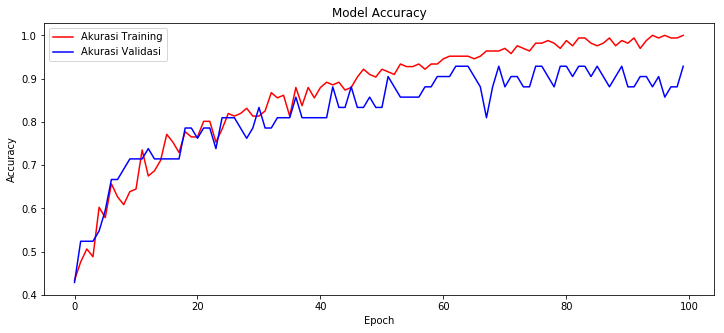

In [11]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(proses.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(proses.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

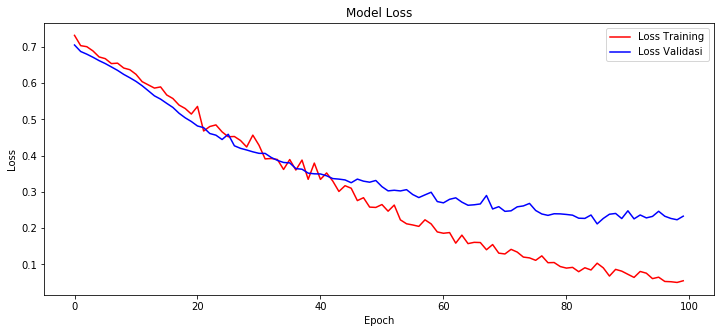

In [12]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(proses.history['loss'],'red', label='Loss Training')
ax1.plot(proses.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

#  Confusion Matrix

Confusion Matrix digunakan untuk dapat mengkalkulasi nilai dari data yang masih dalam bentuk Array dan dikonversikan ke bentuk tipe data integer ataupun float.

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing


In [13]:
training_predicted = model.predict(x_train)
testing_predicted = model.predict(x_test)

Lalu masukkan deklarasi sklean.metrics yang berfungsi sebagai penghitung Confusion Matrix dan deklarasikan lagi data training dan data testing dalam bentuk Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(y_train,training_predicted.round())
testing_cm = confusion_matrix(y_test,testing_predicted.round())

 Nilai Confussion Matrix terdiri dari True Positive (TP), False Negative (FN), False Positive (FP), dan True Negative (TN).

|Confusion Matrix|
|----|--|
|TP|FN|
|FP|TN|

Setiap Confusion Matrix dapat menghitung Accuracy, Specificity, Sensitivity, Precision, dan F1 Score dari data training dan testing dengan menggunakan rumus berikut

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$
$$Specificity = \frac {tn}{tn+fp}$$
$$Sensitivity = \frac {tp}{tp+fn}$$
$$Precision = \frac {tp}{tp+fp}$$
$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

In [15]:
training_cm

array([[77,  0],
       [ 0, 89]], dtype=int64)

In [16]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 1.0
Specificity training 1.0
Sensitivity training 1.0
Precision training 1.0
F1 Score training 1.0


In [17]:
print(testing_cm)

[[18  2]
 [ 1 21]]


hitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [18]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9285714285714286
Specificity testing 0.9545454545454546
Sensitivity testing 0.9
Precision testing 0.9473684210526315
F1 Score testing 0.9230769230769231


hasil dari kalkulasi Confusion Matrix untuk data testing

# Kesimpulan
Dari perhitungan neural network yang telah saya lakukan dalam kasus identifikasi batuan tambang atau batuan biasa dengan dataset yang dapat saya percayai kebenarannya maka dapat saya tarik beberapa kesimpulan:<br>
1. Akurasi yang didapatkan pada awalnya tidak stabil karena data yang acak, namun pada akhirnya di dapatkan akurasi yang bagus dan nilai recall 100% maka dapat dinyatakan bahwa data tersebut layak di gunakan dan bagus <br>
2. Proporsi data yang bagus di antara identifikasi batuan membuat proses identifikasi data menjadi lebih mudah, dari 97 data batuan yang benar benar batuan tambang di identifikasi sebagai batuan tambang <br>
3. klasifikasi secara biner lebih effektif di gunakan karena data output yang berupa nilai 1 atau 0 saja <br>

# Referensi
1. Paper [Analysis of hidden units in a layered network trained to classify sonar targets](https://www.researchgate.net/publication/222469891_Analysis_of_hidden_units_in_a_layered_network_trained_to_classify_sonar_targets)

2. Dataset [Sonar](https://www.kaggle.com/adx891/sonar-data-set)